Phần này chọn ra các features quan trọng đối với mẫu và việc phân cụm

In [9]:
# imports
import numpy as np
import pandas as pd

In [10]:
# read the data
df = pd.read_csv('Food_nutrions_fact.csv', low_memory=False)
df.head()

,food_id,food_name,food_group,"tocotrienol, beta",theobromine,"magnesium, mg",vitamin d3 (cholecalciferol),sfa 18:0,vitamin b-6,alanine,...,"fatty acids, total monounsaturated",glycine,thiamin,aspartic acid,"alcohol, ethyl",cholesterol,"cryptoxanthin, beta",vitamin e (alpha-tocopherol),betaine,"carotene, alpha"
0,167782,"abiyuch, raw",Fruits and Fruit Juices,-,-,24.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,171687,"acerola juice, raw",Fruits and Fruit Juices,-,0.0,12.0,-,0.016,0.004,-,...,0.082,-,0.02,-,0.0,0.0,0.0,0.18,-,0.0
2,171686,"acerola, (west indian cherry), raw",Fruits and Fruit Juices,-,-,18.0,-,0.016,0.009,-,...,0.082,-,0.02,-,0.0,0.0,-,-,-,-
3,168061,acorn stew (apache),American Indian/Alaska Native Foods,0.0,-,12.0,-,0.39,0.055,0.45,...,1.68,0.42,0.175,0.83,-,20.0,-,0.3,-,-
4,168992,"agave, cooked (southwest)",American Indian/Alaska Native Foods,0.0,0.0,39.0,-,-,0.087,-,...,-,-,0.012,-,0.0,0.0,0.0,0.36,0.4,0.0


In [11]:
# ignore food_id and food_group
df_main = df.drop(['food_id', 'food_group'], axis=1)
df_main.head()

,food_name,"tocotrienol, beta",theobromine,"magnesium, mg",vitamin d3 (cholecalciferol),sfa 18:0,vitamin b-6,alanine,sfa 24:0,tfa 16:1 t,...,"fatty acids, total monounsaturated",glycine,thiamin,aspartic acid,"alcohol, ethyl",cholesterol,"cryptoxanthin, beta",vitamin e (alpha-tocopherol),betaine,"carotene, alpha"
0,"abiyuch, raw",-,-,24.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,"acerola juice, raw",-,0.0,12.0,-,0.016,0.004,-,-,-,...,0.082,-,0.02,-,0.0,0.0,0.0,0.18,-,0.0
2,"acerola, (west indian cherry), raw",-,-,18.0,-,0.016,0.009,-,-,-,...,0.082,-,0.02,-,0.0,0.0,-,-,-,-
3,acorn stew (apache),0.0,-,12.0,-,0.39,0.055,0.45,0.0,-,...,1.68,0.42,0.175,0.83,-,20.0,-,0.3,-,-
4,"agave, cooked (southwest)",0.0,0.0,39.0,-,-,0.087,-,-,-,...,-,-,0.012,-,0.0,0.0,0.0,0.36,0.4,0.0


In [12]:
col_mapping = {
    "food_name": "name",
    "water": "water",
    "energy": "energy",
    "protein": "protein",
    "total lipid (fat)": "total lipid",
    # "carbohydrate, by difference": "carbohydrate", = sugar + fiber
    
    "iron, fe": "iron",
    "sodium, na": "sodium",
    "calcium, ca": "calcium",
    "potassium, k": "potassium",
    "phosphorus, p": "phosphorus",
    "magnesium, mg": "magnesium",
    "zinc, zn": "zinc",
    
    "thiamin": "vitamin B1", # Vitamin Bs
    "riboflavin": "vitamin B2",
    "niacin": "vitamin B3",
    "vitamin b-6": "vitamin B6",
    "folate, total": "vitamin B9",
    "vitamin b-12": "vitamin B12",
    
    "cholesterol": "cholesterol",
    
    "fiber, total dietary": "fiber",
    "total sugars": "sugars",
    
    "vitamin a, rae": "vitamin A", # Vitamin A
    "vitamin c, total ascorbic acid": "vitamin C", # Vitamin C
    "vitamin d (d2 + d3)": "vitamin D", # Vitamin D
    "vitamin e (alpha-tocopherol)": "vitamin E", # Vitamin E
    "vitamin k (phylloquinone)": "vitamin K", # Vitamin K
}

In [13]:
# Rename and get columns that are needed
official_df = df_main.rename(columns=col_mapping)
official_df = official_df[list(col_mapping.values())]
# Remove rows with '-' values
official_df = official_df.replace('-', np.nan)
official_df = official_df.dropna()
print(official_df.shape)

# Remove product names
official_df_numeric = official_df.iloc[:, 1:].apply(pd.to_numeric)


(4159, 26)


In [14]:
# Covarriance matrix
cov_matrix = official_df_numeric.corr()
cov_matrix

,water,energy,protein,total lipid,iron,sodium,calcium,potassium,phosphorus,magnesium,...,vitamin B9,vitamin B12,cholesterol,fiber,sugars,vitamin A,vitamin C,vitamin D,vitamin E,vitamin K
water,1.000000,-0.625042,-0.189392,-0.493166,-0.361162,-0.149258,-0.258851,-0.254306,-0.319472,-0.453821,...,-0.285475,-0.007048,0.022010,-0.375532,-0.451283,-0.073092,-0.020708,-0.077845,-0.280748,0.014766
energy,-0.625042,1.000000,0.115508,0.606850,0.192853,0.036461,0.147539,0.102725,0.155819,0.205957,...,0.138133,0.020678,0.046949,0.149857,0.229311,0.066976,-0.010911,0.080142,0.289790,0.005593
protein,-0.189392,0.115508,1.000000,0.110153,0.109879,0.022513,0.077650,0.216074,0.374661,0.221791,...,0.041950,0.304935,0.363816,-0.053432,-0.271345,-0.001308,-0.071323,0.097909,-0.013527,-0.081802
total lipid,-0.493166,0.606850,0.110153,1.000000,0.002266,0.022520,0.044174,-0.015508,0.103509,0.127965,...,-0.038554,0.012133,0.123843,-0.003519,-0.019578,0.045330,-0.053286,0.086004,0.399300,0.010109
iron,-0.361162,0.192853,0.109879,0.002266,1.000000,0.012092,0.363692,0.213991,0.192511,0.428965,...,0.456809,0.152224,-0.008262,0.381180,0.082737,0.148505,0.046976,0.139312,0.199638,0.295283
sodium,-0.149258,0.036461,0.022513,0.022520,0.012092,1.000000,0.138961,0.004775,0.135924,0.012600,...,0.038072,-0.003799,-0.000959,-0.012809,-0.007497,0.001185,-0.020310,0.010184,0.008446,-0.016857
calcium,-0.258851,0.147539,0.077650,0.044174,0.363692,0.138961,1.000000,0.250051,0.688144,0.293534,...,0.096755,0.018966,-0.019108,0.186681,0.117571,0.100172,0.070777,0.132342,0.106678,0.210592
potassium,-0.254306,0.102725,0.216074,-0.015508,0.213991,0.004775,0.250051,1.000000,0.346613,0.450993,...,0.129908,0.025538,-0.013990,0.303057,0.033395,0.075154,0.111726,0.035125,0.075264,0.131001
phosphorus,-0.319472,0.155819,0.374661,0.103509,0.192511,0.135924,0.688144,0.346613,1.000000,0.359045,...,0.111864,0.130578,0.130646,0.145009,-0.033811,0.055569,0.001778,0.096934,0.089675,-0.035157
magnesium,-0.453821,0.205957,0.221791,0.127965,0.428965,0.012600,0.293534,0.450993,0.359045,1.000000,...,0.274529,0.011215,-0.076542,0.578269,0.077104,0.084497,0.078974,0.034626,0.272163,0.219901


0.7698922753334045


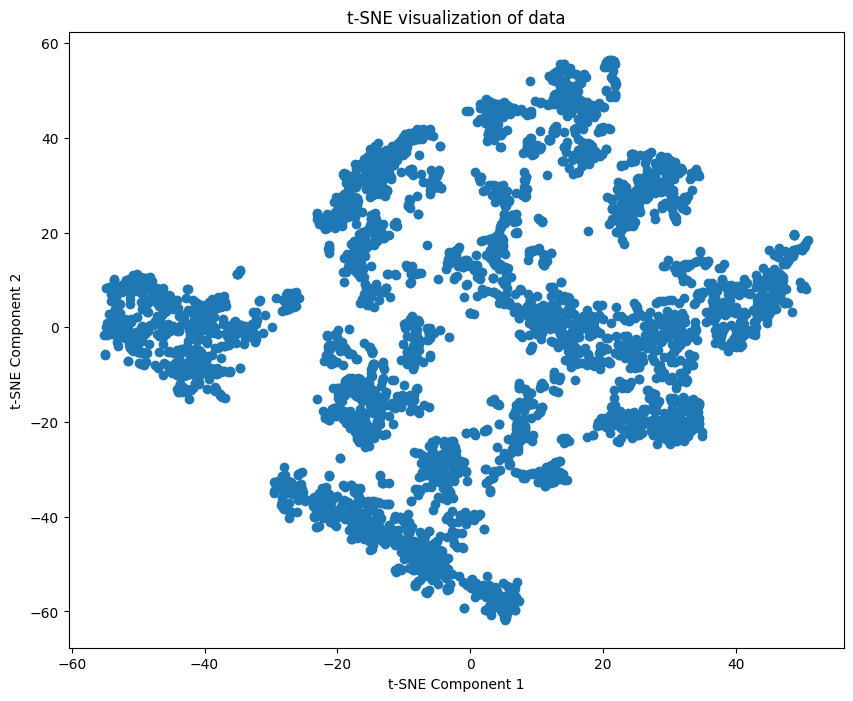

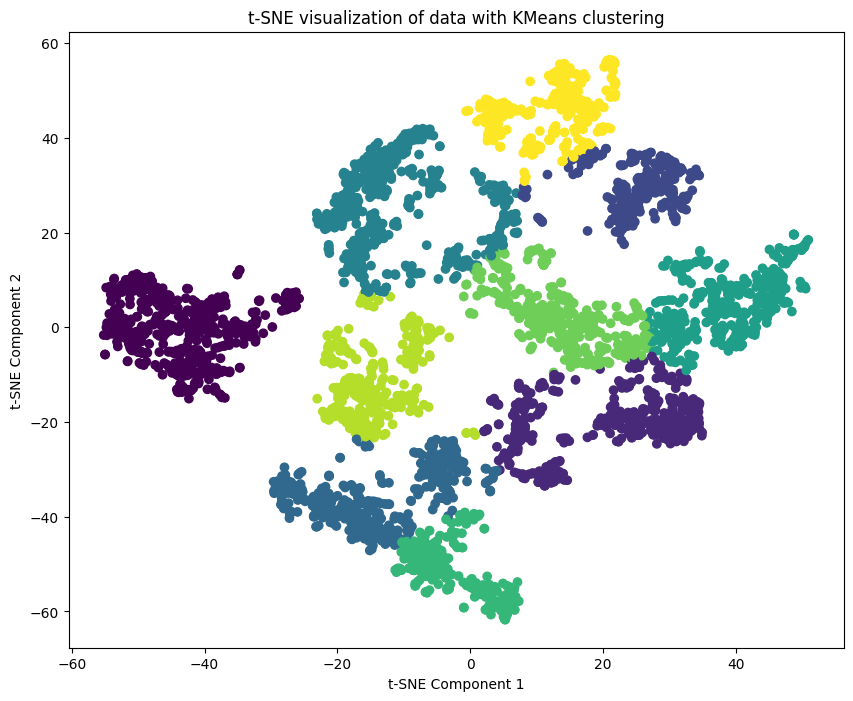

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

sample_df = official_df_numeric

tsne = TSNE(n_components=2, random_state=42, perplexity=55)
tsne_results = tsne.fit_transform(sample_df)
print(tsne.kl_divergence_)

# # Plot the result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE visualization of data')
plt.show()

from sklearn.cluster import KMeans

# Create a KMeans object
kmeans = KMeans(n_clusters=10, random_state=42)  # Change n_clusters to the number of clusters you want

# Fit the KMeans object to the t-SNE results
kmeans.fit(tsne_results)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the t-SNE results with color coding for clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE visualization of data with KMeans clustering')
plt.show()